In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

In [8]:
X, y = make_moons(n_samples=100,noise=0.25, random_state=2)


In [9]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [10]:
df.head()

,Feature_1,Feature_2
0,1.040513,-0.023349
1,-0.554741,1.270138
2,-0.072372,-0.177901
3,-0.047196,1.218836
4,0.913794,0.859883


In [11]:
df['Target'] = y

In [12]:
df.head()

,Feature_1,Feature_2,Target
0,1.040513,-0.023349,1
1,-0.554741,1.270138,0
2,-0.072372,-0.177901,1
3,-0.047196,1.218836,0
4,0.913794,0.859883,0


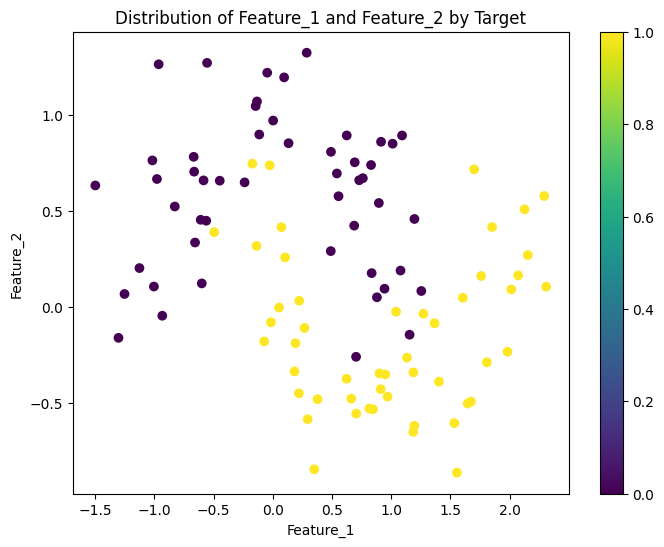

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Target'], cmap='viridis')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Distribution of Feature_1 and Feature_2 by Target')
_ = plt.colorbar()

In [14]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
X = df.iloc[:, 0:2].values
y = df.iloc[:,-1].values

In [16]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.get_weights()

[array([[ 0.6384726 ,  0.6994572 , -0.06559885, -0.68774045, -0.2412538 ,
          0.40365487,  0.22631472, -0.45709234, -0.26972786,  0.0152632 ],
        [-0.4279847 , -0.6457027 , -0.6004189 , -0.01784921,  0.15657556,
         -0.02887058,  0.14822829, -0.42506933,  0.2852949 ,  0.16229773]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.11531532,  0.02248502,  0.31263995,  0.35472405,  0.4397686 ,
         -0.15945643, -0.26437727,  0.5205507 ,  0.09907377,  0.10628754],
        [-0.13816169, -0.35052973,  0.013798  ,  0.48183513,  0.40933967,
          0.25677055,  0.30583936, -0.19116744, -0.4478377 , -0.34245497],
        [ 0.53862107,  0.44712102, -0.16055375, -0.39101082, -0.01634276,
          0.16148102, -0.05128017,  0.06511694, -0.08500186, -0.14660743],
        [ 0.09924954, -0.4204498 ,  0.4554224 , -0.00667042,  0.12162113,
          0.43309164,  0.09053677, -0.12463155, -0.49524558,  0.29578203],
        [-0.06877

In [18]:
initial_weights = model.get_weights()

In [19]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[-0.57500666, -0.13060527, -0.13480152,  0.72158045, -0.23307729,
          0.58178437,  0.15444219,  0.02728517,  0.49787354,  1.1815997 ],
        [ 0.10104055,  0.77915347, -0.36854896,  0.7812011 , -0.40085033,
          0.09213971,  1.2309034 ,  0.858184  ,  0.04931371,  0.17540532]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.191856  ,  0.25229388,  0.14225224, -0.3396127 , -0.5057083 ,
         -0.3269243 , -0.19326904,  0.20073597,  0.14160539,  0.5189629 ],
        [-0.19831409,  0.16314372, -0.5112616 , -0.10255643,  0.6093005 ,
         -0.01141424,  0.22505413,  0.31102514,  0.12586881,  0.02343724],
        [ 0.02193388,  0.5863433 , -0.47231948, -0.04210601, -0.46442637,
         -0.53100073,  0.25195387,  0.08827155, -0.23118237,  0.04043854],
        [-0.31059548, -0.00935984,  0.2999043 , -0.23324998,  0.18500073,
         -0.3552157 ,  0.04051587, -0.07889148, -0.20669985,  0.14104266],
        [-0.13017

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [27]:
history = model.fit(X, y, epochs=1000, validation_split=0.2,verbose=0)

In [28]:
model.get_weights()

[array([[-0.3498715 , -0.27346474,  0.19051178,  1.2094742 , -0.13236405,
          0.54048365,  0.06039457, -0.2352638 ,  0.47639775,  1.8697535 ],
        [ 0.15442239,  0.46635377, -0.32089996,  0.765189  , -0.7952223 ,
          0.11921964,  1.2925899 ,  0.6242852 , -0.04645278, -0.37648296]],
       dtype=float32),
 array([ 0.20635453,  0.08116785, -0.02545224, -0.6985971 ,  0.14293434,
        -0.03989872,  0.08094262,  0.03038154, -0.02242982, -0.47201404],
       dtype=float32),
 array([[-0.16763966,  0.06050038,  0.4301257 , -0.5296048 , -0.2320971 ,
         -0.04588119,  0.09251269, -0.05918573,  0.31314057,  0.71625876],
        [ 0.04228211,  0.16202144, -0.420453  , -0.17096245,  0.6657544 ,
          0.12378147,  0.39211467,  0.12953249,  0.15847951,  0.14379026],
        [-0.23365113,  0.53212124, -0.5171073 ,  0.02050641, -0.46091983,
         -0.6537277 ,  0.09324618,  0.31499016, -0.24611698, -0.10690534],
        [-0.47137576, -0.10343099,  0.45198932, -0.5157786 , 

In [29]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

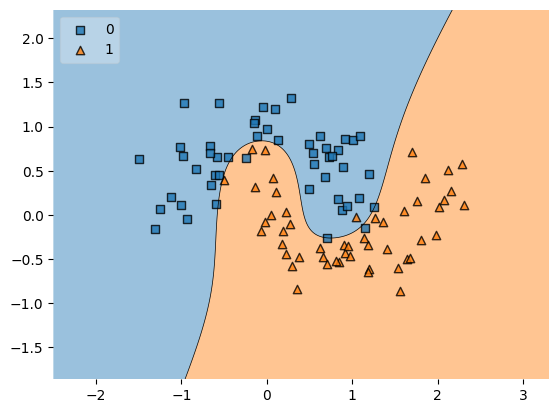

In [30]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)

In [31]:
model1 = Sequential()
model1.add(Input(shape=(2,)))
model1.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model1.get_weights()

[array([[ 0.876837  , -1.1975096 , -0.6798784 , -0.89672554, -0.20434701,
         -0.07494237, -0.04112221, -0.45299923,  1.7380078 , -0.99410623],
        [ 0.6880613 ,  1.0230776 ,  2.0346363 ,  0.19708487,  0.0572716 ,
          1.0975112 , -0.00459259,  1.1101547 ,  2.0917947 ,  1.6071295 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-6.47537003e-04,  1.61825016e-01,  7.97115445e-01,
         -3.76910329e-01, -7.05563724e-01, -3.34475964e-01,
         -5.57075024e-01,  5.32395959e-01, -4.33783263e-01,
         -1.38999209e-01],
        [-2.68335432e-01, -1.15291856e-01,  1.42107785e-01,
          1.19848505e-01,  1.08396418e-01,  3.72748941e-01,
          7.38250494e-01,  7.73307860e-01,  5.22735953e-01,
          7.60570318e-02],
        [ 4.75630522e-01,  2.33527809e-01,  2.15074837e-01,
          1.07053846e-01,  9.04037714e-01, -1.69867441e-01,
          8.20067748e-02,  2.09899247e-01, -1.08475603e-01,
         -2.9686698

In [34]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [35]:
history = model1.fit(X, y, epochs=1000, validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

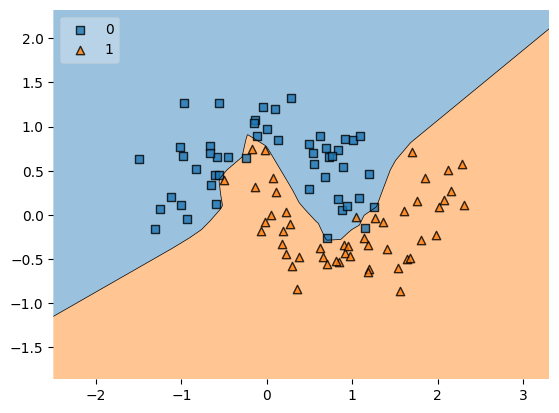

In [36]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)